# Analysis of visualization of classes

### Import libraries

In [2]:
from preprocessing_utils_2d_cnn import read_in_data, preprocess_2d_cnn, MAX_BYTE_VALUE
import matplotlib.pyplot as plt

### Read in the data to df_train, df_val and df_test

In [8]:
df_train, df_val, df_test = read_in_data(data_path='../../data/12_10000', file_suffix='12_10000')

In [14]:
import os
file_suffix = "10_10000"
try:
    os.mkdir("../../data/{0}/".format(file_suffix))
except OSError as error:
    print(error)

In [15]:
df_train[~df_train["label"].isin(["Cloudflare", "GoogleDocs"])].to_csv("../../data/{0}/train_{0}.csv".format(file_suffix),
                index=False)

In [16]:
df_val[~df_val["label"].isin(["Cloudflare", "GoogleDocs"])].to_csv("../../data/{0}/val_{0}.csv".format(file_suffix),
                index=False)

In [17]:
df_test[~df_test["label"].isin(["Cloudflare", "GoogleDocs"])].to_csv("../../data/{0}/test_{0}.csv".format(file_suffix),
                index=False)

### Plot images per class

In [18]:
def plot_class_imgs(df = df_train, k = 7): # k examples per class
    for label in df["label"].unique():
        print(label)

        df_label = df[df["label"] == label]
        x_label = MAX_BYTE_VALUE - df_label.drop("label", axis=1)
        imgs = x_label.sample(k).values #, random_state=42

        plt.figure(figsize=(2*k,4))
        for i in range(imgs.shape[0]):
            plt.subplot(100 + k * 10 + i + 1)
            plt.imshow(imgs[i].reshape(40,37), cmap="binary") # reshape the 1480 bytes to a 40 by 37 image
            plt.axis("off")
        plt.show()

WhatsApp


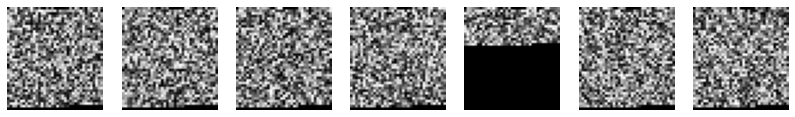

GoogleServices


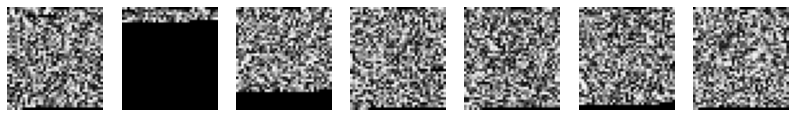

Instagram


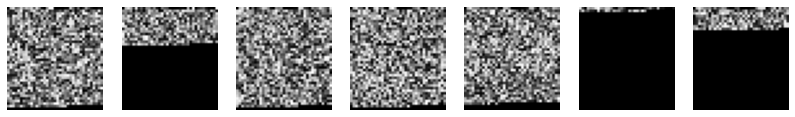

PlayStore


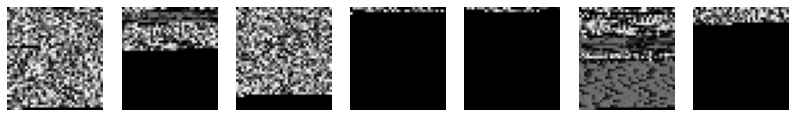

TeamViewer


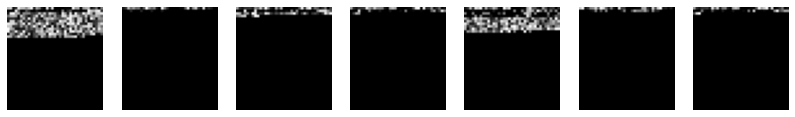

BitTorrent


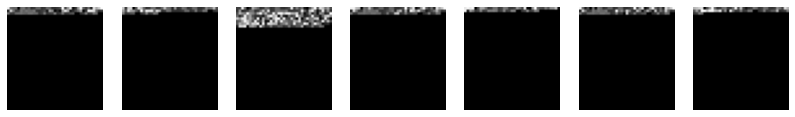

GoogleDocs


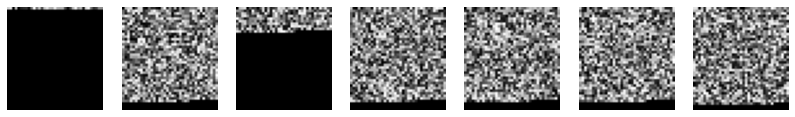

WindowsUpdate


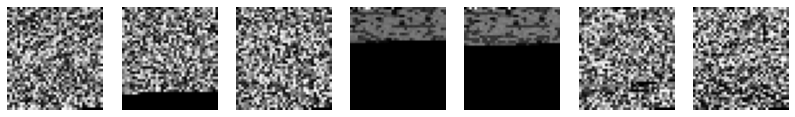

Cloudflare


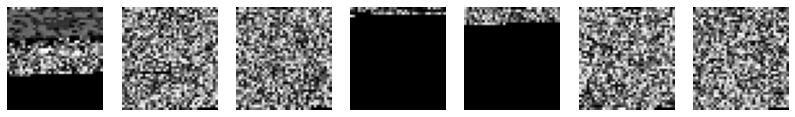

GMail


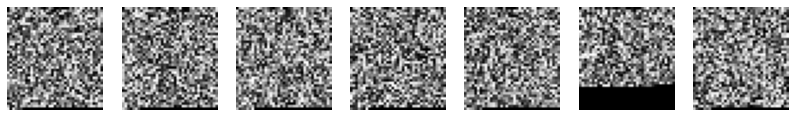

Facebook


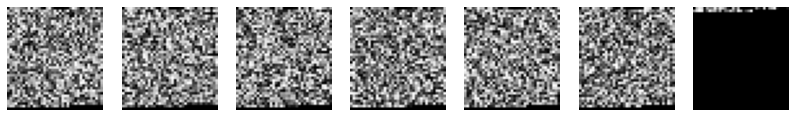

YouTube


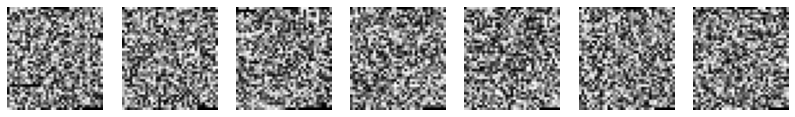

In [19]:
plot_class_imgs()

In [20]:
def plot_class_median(df = df_train.groupby("label").median().reset_index()): # k examples per class
    fig = plt.figure(figsize=(7, 7), dpi = 100)
    i = 1
    for label in df["label"].unique():

        df_label = df[df["label"] == label]
        x_label = MAX_BYTE_VALUE - df_label.drop("label", axis=1)
        imgs = x_label.values #, random_state=42
    
        ax = fig.add_subplot(3, 4, i)
        ax.set_title(label)
        ax.imshow(imgs[0].reshape(40,37), cmap="binary")
        ax.axis("off")
        i+=1

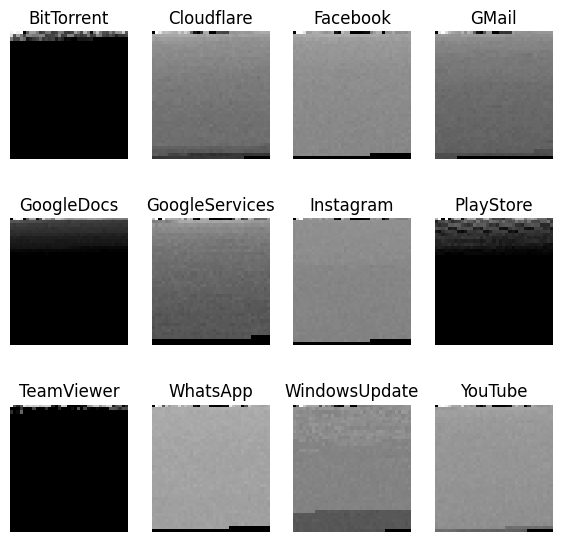

In [21]:
plot_class_median()